In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.externals import joblib
from sklearn.ensemble import RandomForestClassifier
from IPython.core.display import display
pd.options.display.max_columns = 999
from tqdm import tqdm_notebook
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score,precision_recall_curve,roc_curve,confusion_matrix

In [3]:
lst_dt = list(zip([2017]*12 + [2018]*12, list(range(1,13))*2))
# lst_dt = list(zip([2017]*12, list(range(1,13))))

In [3]:
lst_df = []
for asof_year,asof_month in tqdm_notebook(lst_dt[:-3]):
    try:
        df = pd.read_csv('../bin/monthly/df_feat_'+str(asof_year).zfill(4)+str(asof_month).zfill(2)+'.csv')
#         print(df.shape)
#         df = df.loc[df["('dt', 'amin')"]<=8]
        df = df.loc[df['PAYMENT-mean']>500]
        print(df.shape)
        lst_df.append(df)
    except:
        print(f'month: {asof_month}, year: {asof_year} is skipped...')

df_train = pd.concat(lst_df).set_index('Unnamed: 0')

lst_df = []
for asof_year,asof_month in tqdm_notebook(lst_dt[-3:]):
    df = pd.read_csv('../bin/monthly/df_feat_'+str(asof_year).zfill(4)+str(asof_month).zfill(2)+'.csv')
#     print(df.shape)
#     df = df.loc[df["('dt', 'amin')"]<=8]
    df = df.loc[df['PAYMENT-mean']>500]
    print(df.shape)
    lst_df.append(df)
df_test = pd.concat(lst_df).set_index('Unnamed: 0')

The history saving thread hit an unexpected error (OperationalError('database or disk is full',)).History will not be written to the database.


month: 1, year: 2017 is skipped...
(5104, 105)
(5158, 105)
(14863, 105)
(109358, 105)
(125648, 105)
(128274, 105)
(128883, 105)
(129097, 105)
(128644, 105)
(128480, 105)
(127973, 105)
(127304, 105)
(127214, 105)
(125115, 105)
(125096, 105)
(123455, 105)
(122173, 105)
(120893, 105)
(119834, 105)
(119120, 105)



(117091, 105)
(116032, 105)
(114254, 105)



In [4]:
X_train = df_train.drop('churn',axis=1).values
y_train = df_train['churn'].values
X_test = df_test.drop('churn',axis=1).values
y_test = df_test['churn'].values

In [5]:
# RandomForestClassifier(n_estimators=100,criterion='entropy',min_samples_leaf=3,oob_score=True,n_jobs=-1) ---1st model
rfc = RandomForestClassifier(n_estimators=100,criterion='entropy',min_samples_leaf=3,oob_score=True,n_jobs=-1)

In [6]:
rfc.fit(X_train,y_train)
y_pred = rfc.predict_proba(X_test)[:,1]

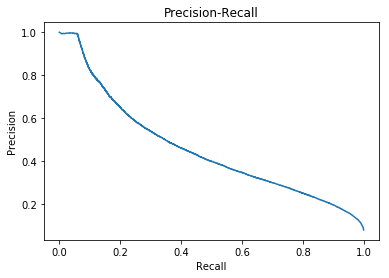

In [7]:
pr,re,th = precision_recall_curve(y_test,y_pred)
plt.title('Precision-Recall')
plt.plot(re,pr)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

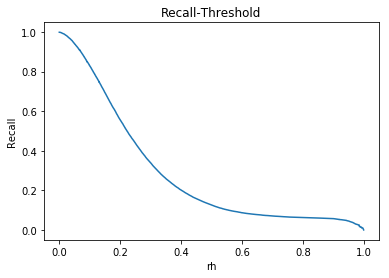

In [8]:
pr,re,th = precision_recall_curve(y_test,y_pred)
plt.title('Recall-Threshold')
plt.plot(th,re[1:])
plt.xlabel('thd')
plt.ylabel('Recall')
plt.show()

In [9]:
print(classification_report(y_test,y_pred>0.2))

              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94    319099
         1.0       0.37      0.56      0.44     28278

   micro avg       0.89      0.89      0.89    347377
   macro avg       0.66      0.74      0.69    347377
weighted avg       0.91      0.89      0.90    347377



In [10]:
from sklearn.externals import joblib
# Output a pickle file for the model
joblib.dump(rfc, '../out/rfc_1.pkl')

['../out/rfc_1.pkl']